**PROYECTO FINAL BOOTCAMPO ANÁLISIS Y VISUALIZACIÓN DE DATOS**

Presentado por: Luisa Fernanda Cruz Vasallo

**Paso 1: Integración de Bibliotecas**

En este paso se deben importar las bibliotecas necesarias para el manejo y la visualización de datos, para este caso se importarán: PANDAS, MATPLOTLIB, FOLIUM, SEABORN, Y PLOTLY.

In [ ]:
pip install pandas

In [ ]:
pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.2 MB/s eta 0:00:00


In [ ]:
pip install pymssql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.5 MB/s eta 0:00:00


In [ ]:
pip install matplotlib


In [ ]:
pip install sqlalchemy

In [ ]:
pip install folium

In [ ]:
pip install seaborn


In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import mysql.connector
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

**Paso 2: Limpieza de Datos**

Los datasets seleccionados para este ejercicio son:

1.Producto interno bruto (PIB) total anual a precios constantes en dólares.

Disponible en => https://statistics.cepal.org/portal/cepalstat/dashboard.html?theme=2&lang=es

2.Tasa de variación de la intensidad energética del PIB (Oferta primaria de energía/ PIB a precios constantes en dólares de 2010).

Disponible en => https://statistics.cepal.org/portal/cepalstat/dashboard.html?theme=3&lang=es

A través de la herramienta *Open Refine* se realizará la limpieza de los dataset seleccionados anteriormente:

Estos datasets se aplicarán para el período de tiempo comprendido entre 2015-2020, para los países: Argentina, Barbados, Belice, Bolivia, Brasil, Chile, Colombia, Costa Rica, Cuba, Ecuador, El Salvador, Granada, Guatemala, Guyana, Haití, Honduras, Jamaica, México, Nicaragua, Panamá, Paraguay, Perú, República Dominicana, Suriname, Trinidad y Tabago, Uruguay, y Venezuela.


Eliminar columnas, cambiar formatos y reemplazar textos de forma masiva:

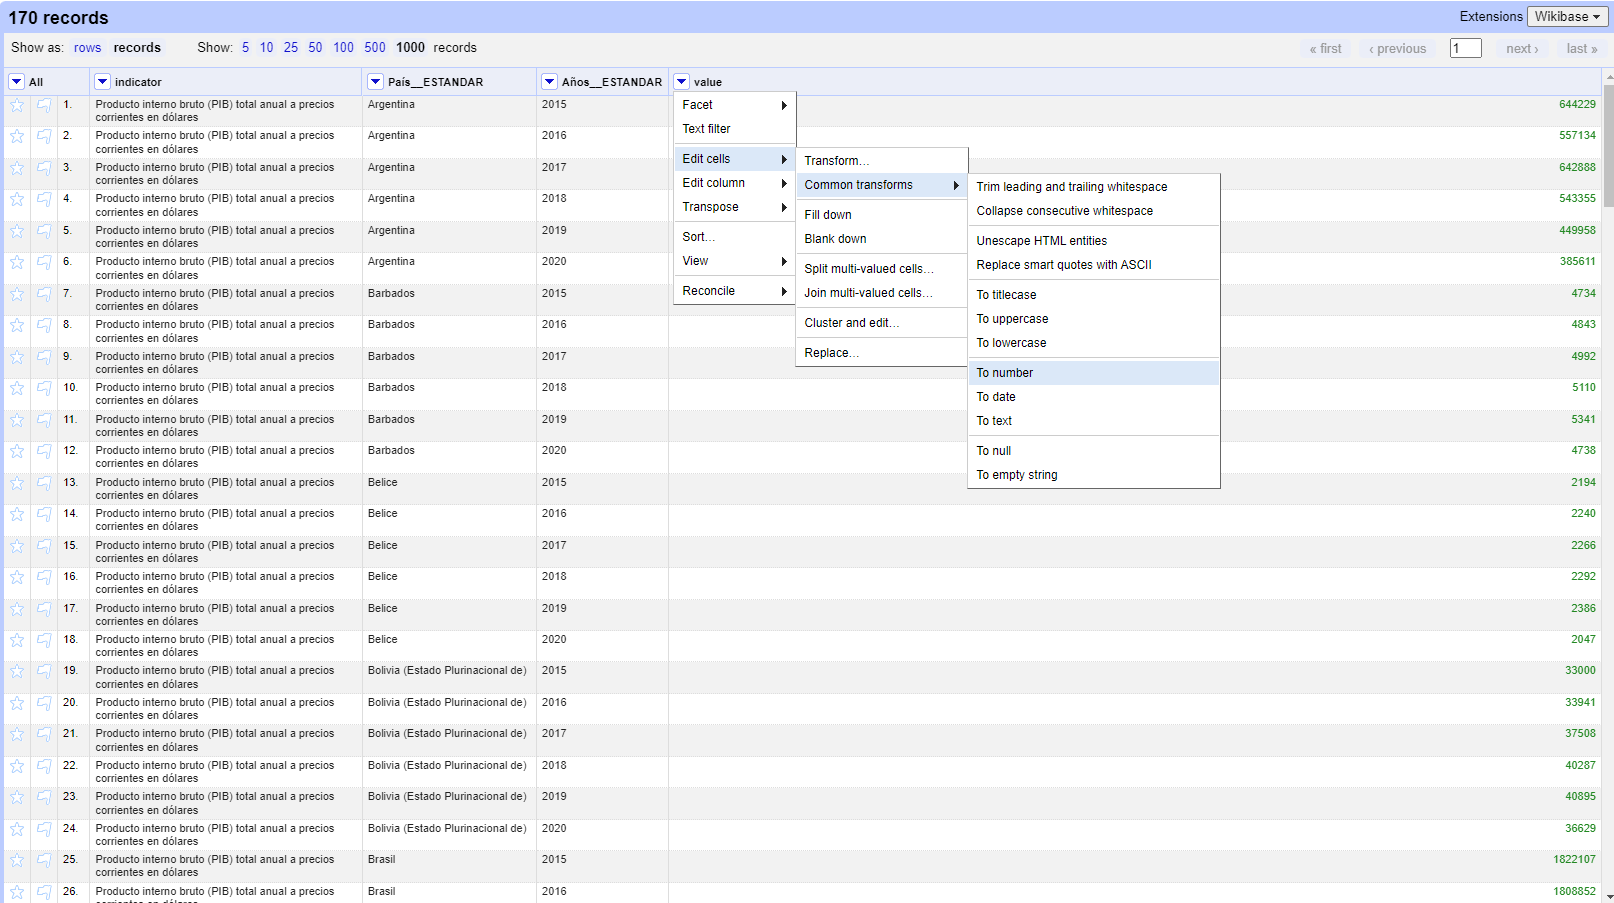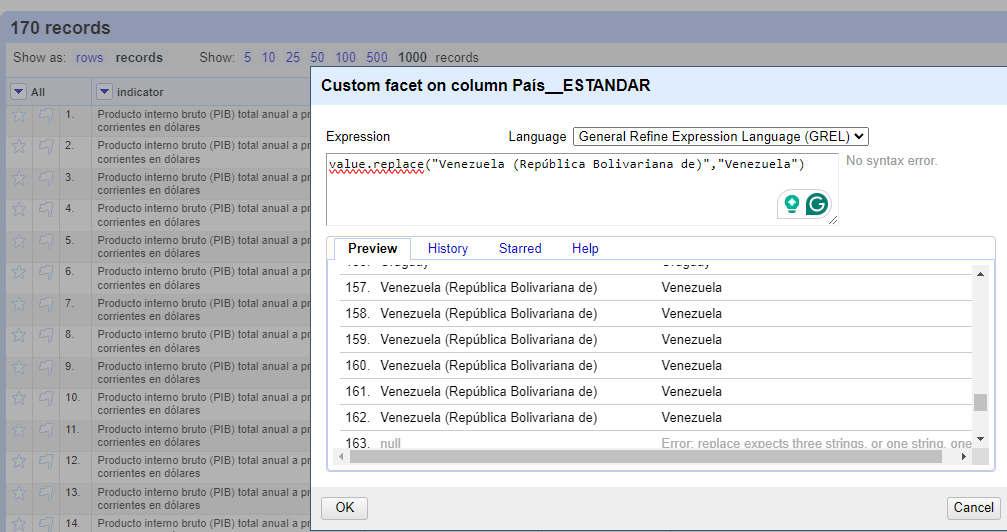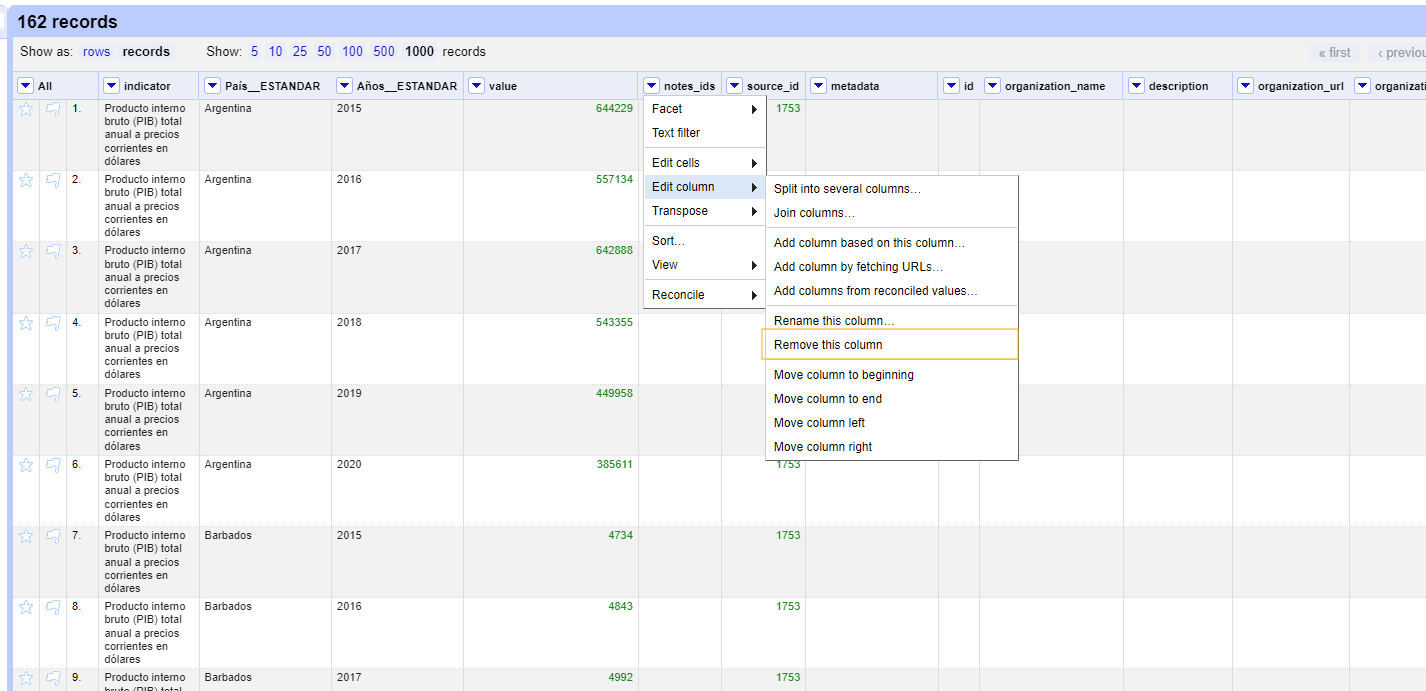


**Paso 3: Carga de datos**

Aquí se deben cargar los datos que se van a analizar y visualizar de una fuente externa, en este caso los datasets están en formato CSV, lo que implicará leer estos datos en un DataFrame usando la función read_csv("Nombre del archivo.csv" de Pandas.

In [ ]:
datos_1= pd.read_csv('PIB.csv')
print("Datos de datos_1.to_csv;")
print(datos_1)

Datos de datos_1.to_csv;
                            INDICADOR       PAIS   Año   VALOR
0    PIB expresado en Millones de USD  Argentina  2015  644229
1    PIB expresado en Millones de USD  Argentina  2016  557134
2    PIB expresado en Millones de USD  Argentina  2017  642888
3    PIB expresado en Millones de USD  Argentina  2018  543355
4    PIB expresado en Millones de USD  Argentina  2019  449958
..                                ...        ...   ...     ...
157  PIB expresado en Millones de USD  Venezuela  2016  200850
158  PIB expresado en Millones de USD  Venezuela  2017  154055
159  PIB expresado en Millones de USD  Venezuela  2018       0
160  PIB expresado en Millones de USD  Venezuela  2019       0
161  PIB expresado en Millones de USD  Venezuela  2020       0

[162 rows x 4 columns]


In [ ]:
datos_2 = pd.read_csv('intensidad_energetica.csv')
print("Datos de datos_2.to_csv;")
print(datos_2)

Datos de datos_2.to_csv;
                                             INDICADOR                  PAIS  \
0    Tasa de variación de la intensidad energética ...             Argentina   
1    Tasa de variación de la intensidad energética ...             Argentina   
2    Tasa de variación de la intensidad energética ...             Argentina   
3    Tasa de variación de la intensidad energética ...              Barbados   
4    Tasa de variación de la intensidad energética ...              Barbados   
..                                                 ...                   ...   
157  Tasa de variación de la intensidad energética ...  República Dominicana   
158  Tasa de variación de la intensidad energética ...              Suriname   
159  Tasa de variación de la intensidad energética ...     Trinidad y Tobago   
160  Tasa de variación de la intensidad energética ...               Uruguay   
161  Tasa de variación de la intensidad energética ...             Venezuela   

      Año     

In [ ]:
datos_combinados = pd.merge(datos_1, datos_2, on='PAIS')
print("\nDatos combinados:")
print(datos_combinados)


Datos combinados:
                          INDICADOR_x       PAIS  Año_x   VALOR  \
0    PIB expresado en Millones de USD  Argentina   2015  644229   
1    PIB expresado en Millones de USD  Argentina   2015  644229   
2    PIB expresado en Millones de USD  Argentina   2015  644229   
3    PIB expresado en Millones de USD  Argentina   2015  644229   
4    PIB expresado en Millones de USD  Argentina   2015  644229   
..                                ...        ...    ...     ...   
967  PIB expresado en Millones de USD  Venezuela   2020       0   
968  PIB expresado en Millones de USD  Venezuela   2020       0   
969  PIB expresado en Millones de USD  Venezuela   2020       0   
970  PIB expresado en Millones de USD  Venezuela   2020       0   
971  PIB expresado en Millones de USD  Venezuela   2020       0   

                                           INDICADOR_y  Año_y     TASA %  
0    Tasa de variación de la intensidad energética ...   2015  -2.079557  
1    Tasa de variación de 

**Paso 4: Exploración de datos**
En esta etapa se busca comprender la estructura, características y el contenido que poseen los datos que hemos cargado con anterioridad. Se pueden realizar diversas operaciones, como visualizar las primeras filas del DataFrame, obtener información sobre los tipos de datos, revisar estadísticas, realizar promedios, entre otros.

**Conocer el tipo de datos**

In [ ]:
type(datos_combinados)

pandas.core.frame.DataFrame

In [ ]:
datos_combinados.dtypes

INDICADOR_x     object
PAIS            object
Año_x            int64
VALOR            int64
INDICADOR_y     object
Año_y            int64
TASA %         float64
dtype: object

In [ ]:
datos_combinados.columns

Index(['INDICADOR_x', 'PAIS', 'Año_x', 'VALOR', 'INDICADOR_y', 'Año_y',
       'TASA %'],
      dtype='object')

In [ ]:
datos_combinados['PAIS'].describe()

count           972
unique           27
top       Argentina
freq             36
Name: PAIS, dtype: object

**Paso 5: Análisis Estadístico**

En esta fase, se realizan análisis estadísticos sobre los datos para extraer información útil. Esto puede incluir la agrupación de datos por categorías relevantes y el cálculo de estadísticas descriptivas como el recuento, la media, la mediana, etc. La agrupación y el conteo son operaciones comunes durante esta etapa para comprender la distribución de los datos y las relaciones entre diferentes variables.

**Análisis Estadístico: Conocer diferentes indicadores de una columna (mínimo, máximo, promedio, desviación estándar, conteo, y suma).**

*Conocer variables estadísticas del PIB

In [ ]:
datos_combinados['VALOR'].min()

0

In [ ]:
datos_combinados['VALOR'].max()


2063199

In [ ]:
datos_combinados['VALOR'].mean()


191562.72839506174

In [ ]:
datos_combinados['VALOR'].std()


404050.8108980275

In [ ]:
datos_combinados['VALOR'].count()


972

In [ ]:
datos_combinados['VALOR'].sum()

186198972

In [ ]:
conteo_por_pais= datos_combinados.groupby('PAIS').count()
print(conteo_por_pais)

                      INDICADOR_x  Año_x  VALOR  INDICADOR_y  Año_y  TASA %
PAIS                                                                       
Argentina                      36     36     36           36     36      36
Barbados                       36     36     36           36     36      36
Belice                         36     36     36           36     36      36
Bolivia                        36     36     36           36     36      36
Brasil                         36     36     36           36     36      36
Chile                          36     36     36           36     36      36
Colombia                       36     36     36           36     36      36
Costa Rica                     36     36     36           36     36      36
Cuba                           36     36     36           36     36      36
Ecuador                        36     36     36           36     36      36
El Salvador                    36     36     36           36     36      36
Granada     

**Paso 6: Visualización gráfica de los datos**

In [ ]:
pib = pd.read_csv('PIB.csv')

In [ ]:
pib = PIB.groupby('PAIS')['VALOR'].mean()

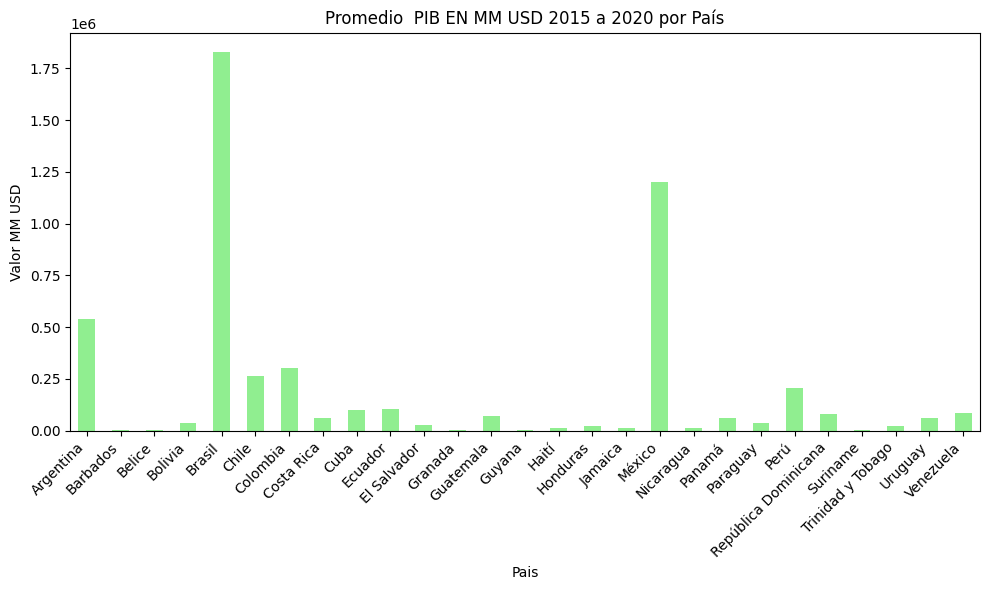

In [ ]:
plt.figure(figsize=(10, 6))
pib.plot(kind='bar', color='lightgreen')
plt.title('Promedio  PIB EN MM USD 2015 a 2020 por País')
plt.xlabel('Pais')
plt.ylabel('Valor MM USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusiones:**

1.El País con el mayor PIB promedio durante el 2015-2020 es Brasil, seguido de México y Argentina.
2.Los países con el menor PIB promedio durante el 2015-2020 son Barbados, Belice, Granada, Guyana, Suriname, Haití, Jamaica, Nicaragua, Suriname, y Trinidad y Tobago.

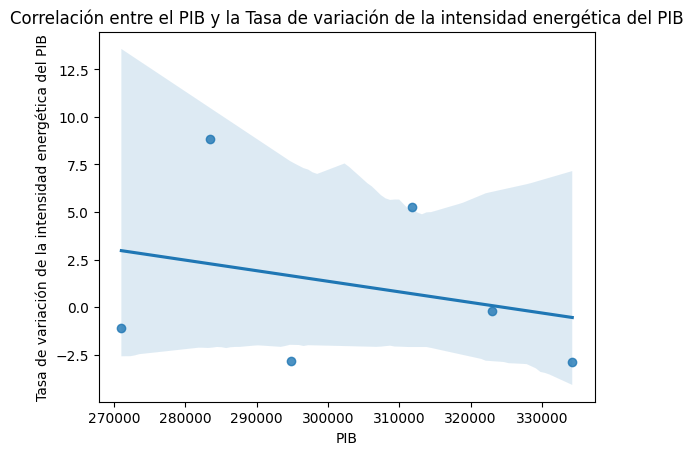

In [ ]:
correlacion = pd.read_csv('correlacion.csv')

sns.regplot(x='PIB', y='Tasa de variación de la intensidad energética del PIB', data=correlacion)
plt.title('Correlación entre el PIB y la Tasa de variación de la intensidad energética del PIB')
plt.show()

**Conclusion**

Teniendo presente que una tasa positiva, indica un aumento de la intensidad energética respecto al año anterior, es decir un proxy de reducción de eficiencia energética. Mientras que una tasa negativa  indica una reducción de la intensidad energética respecto al año anterior, un aumento de la eficiencia energética del país.

Se puede concluir que a mayor PIB mejor es la eficiencia energética de una país.


**Paso 7: Cargue de los datos en MySQL**
1. Se abre la consola en CMD de MySQL
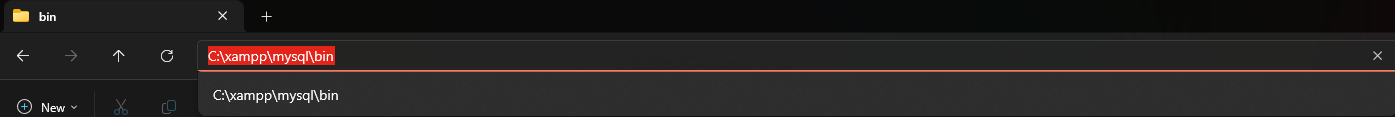

2. Se crea la database que vayamos a usar y en donde se va a crear la tabla
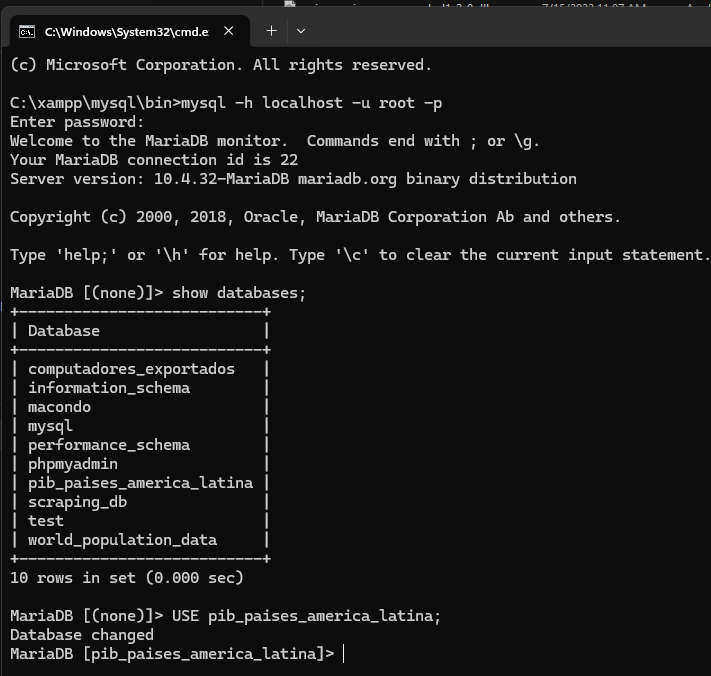

3. Se procede a la creación de la tabla con el siguiente código:




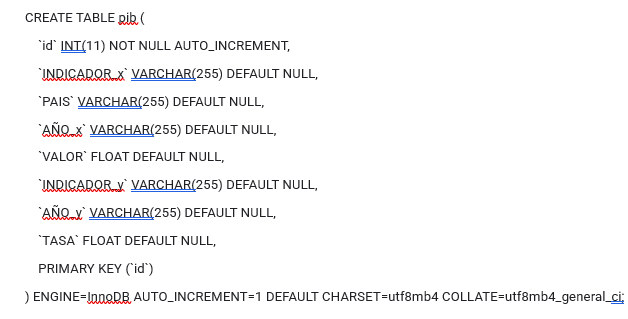

4. Una vez creada la tabla, se procede a la exportación de los datos a la base SQL con el siguiente código:

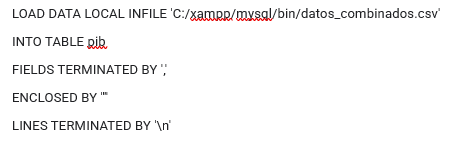

5. Una vez migrada la información a MySQL, se procede a través de este código con el cargue de la información en clevercloud:

image.png

**Paso 8: Conectar con la Base de Datos MySQL**


In [ ]:
def connect_to_database():
    return mysql.connector.connect(
        host="barb1uoghelpbg73msi7-mysql.services.clever-cloud.com",
        database="barb1uoghelpbg73msi7",
        user="uarxqjfbyradluba",
        password="FT9Ny8ERMPgYjB7lBgYo"
    )

**Ejecutar una consulta SQL y pasar los resultados en un DataFrame**

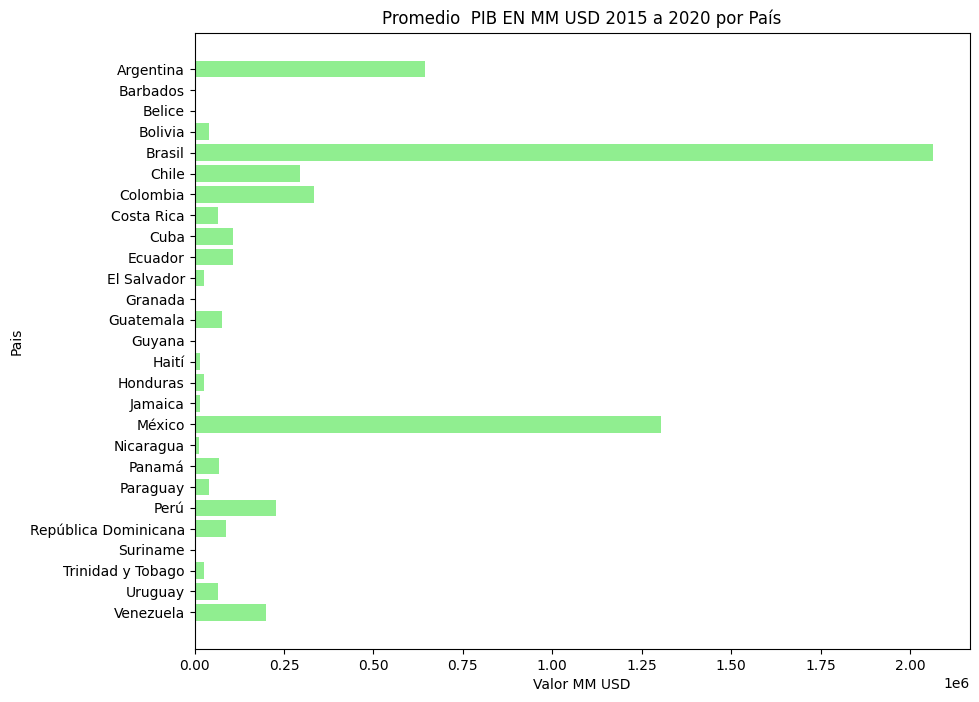

In [ ]:
query = """
SELECT PAIS, VALOR
FROM pib
GROUP BY VALOR
"""
df =run_query(query)

plt.figure(figsize=(10, 8))
plt.barh(df[0], df[1], color='lightgreen')
plt.xlabel('Valor MM USD')
plt.ylabel('Pais')
plt.title('Promedio  PIB EN MM USD 2015 a 2020 por País')
plt.gca().invert_yaxis()
plt.show()

**Conclusiones**

1.Se puede evidenciar que los países con mayor PIB durante el 2015-2020 son: Brasil, México, Argentina y Perú. Se excluye Venezuela, toda vez que no tiene datos desde el 2018.

2.La mayoría de países tienen un PIB promedio por debajo de $250.000 MM USD

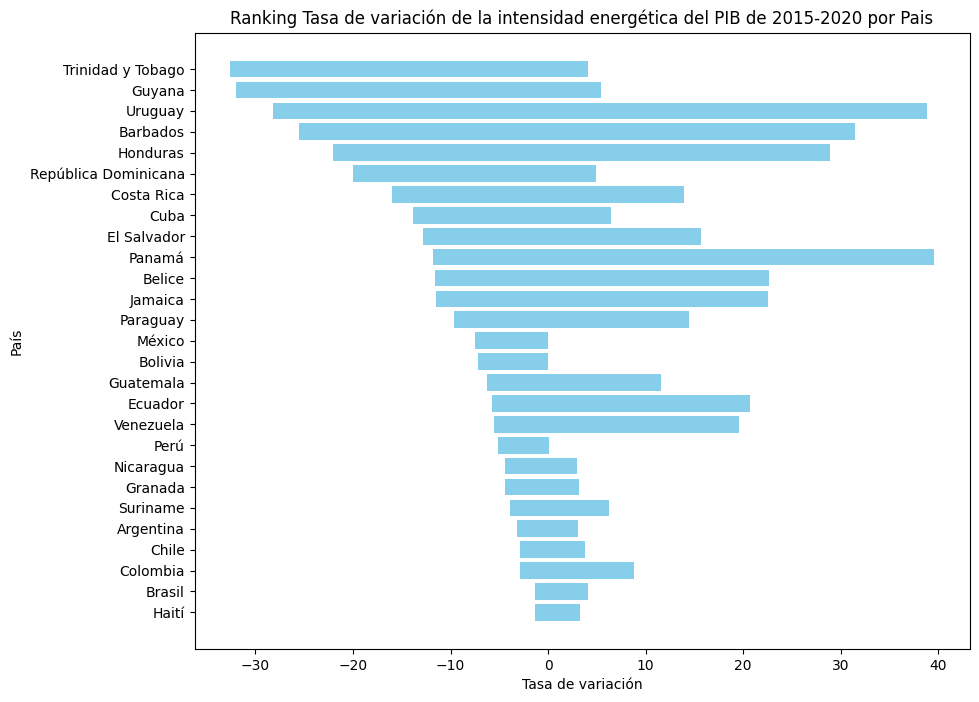

In [ ]:
query2 = """
SELECT PAIS, TASA
FROM pib
ORDER BY TASA ASC
LIMIT 972;
"""
df2 = run_query(query2)
plt.figure(figsize=(10, 8))
plt.barh(df2[0], df2[1], color='SKYBLUE')
plt.xlabel('Tasa de variación')
plt.ylabel('País')
plt.title('Ranking Tasa de variación de la intensidad energética del PIB de 2015-2020 por Pais')
plt.gca().invert_yaxis()
plt.show()

**Conclusiones**

Teniendo presente que una tasa positiva, indica un aumento de la intensidad energética respecto al año anterior, es decir un proxy de reducción de eficiencia energética. Mientras que una tasa negativa indica una reducción de la intensidad energética respecto al año anterior, un aumento de la eficiencia energética del país.

1.El país con la tasa de eficiencia energética más favorable es Trinidad y Tobago

2.El país con la tasa de eficiencia energética menos favorable de la región es Panamá.